# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize period, smas, pct_stop_loss, or margin)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define Optimizations

In [4]:
# pick one
optimize_period = True
optimize_smas = False
optimize_pct = False
optimize_margin = False

# define high low trade periods ranges
if optimize_period:
    Xs = range(2, 15, 1)
    Xs = [str(X) for X in Xs]

# define SMAs ranges
elif optimize_smas:
    Xs = range(20, 200, 10)
    Xs = [str(X) for X in Xs]

# define stop loss percentage ranges
elif optimize_pct:
    Xs = range(70, 96, 1)
    Xs = [str(X) for X in Xs]

# define stop loss percentage ranges
elif optimize_margin:
    Xs = range(10, 21, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_period:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, period=int(X))
    elif optimize_smas:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, sma=int(X))
    elif optimize_pct:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=int(X))
    elif optimize_margin:
        strategies[X] = strategy.Strategy(symbol, capital, start, end, margin=int(X)/10)
    strategies[X].run()
    strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14
annual_return_rate,4.40,5.28,6.73,6.66,7.67,8.03,7.96,7.97,7.34,7.30,6.09,5.58,4.95
max_closed_out_drawdown,-17.19,-18.48,-15.77,-14.02,-14.04,-15.32,-32.73,-32.72,-30.38,-30.34,-30.42,-30.35,-30.33
drawdown_annualized_return,-3.91,-3.50,-2.34,-2.11,-1.83,-1.91,-4.11,-4.10,-4.14,-4.16,-4.99,-5.43,-6.13
drawdown_recovery,-0.91,-0.91,-0.05,-0.05,-0.05,-0.25,-0.13,-0.13,-0.13,-0.13,-0.13,-0.13,-0.13
best_month,8.77,12.12,13.49,10.04,10.05,12.90,17.14,17.13,17.31,17.28,18.78,18.71,18.70
worst_month,-13.77,-15.62,-15.29,-13.53,-13.55,-13.55,-30.97,-30.95,-30.38,-30.34,-30.42,-30.35,-30.33
sharpe_ratio,0.51,0.58,0.72,0.72,0.82,0.83,0.75,0.77,0.71,0.71,0.59,0.54,0.49
sortino_ratio,0.37,0.41,0.52,0.52,0.58,0.61,0.51,0.50,0.47,0.46,0.38,0.35,0.31
monthly_std,2.17,2.17,2.06,1.96,1.98,2.11,2.52,2.45,2.36,2.38,2.36,2.40,2.32
pct_time_in_market,34.60,32.30,31.42,30.03,29.15,29.68,29.72,28.16,28.41,27.95,27.53,27.26,26.50


Bar graphs

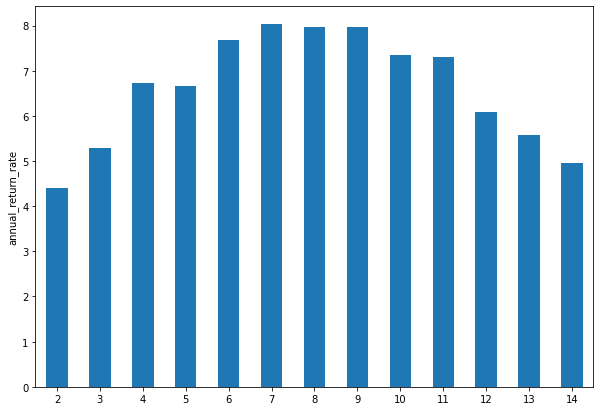

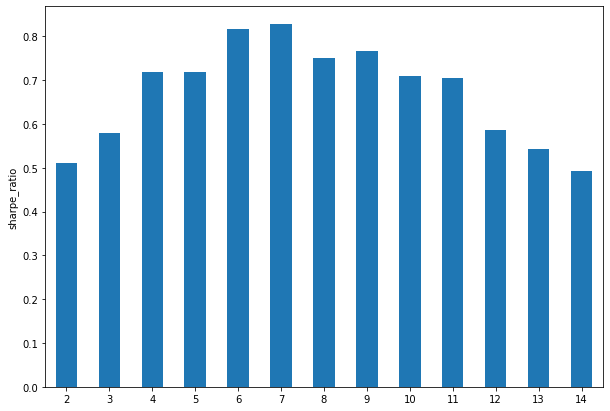

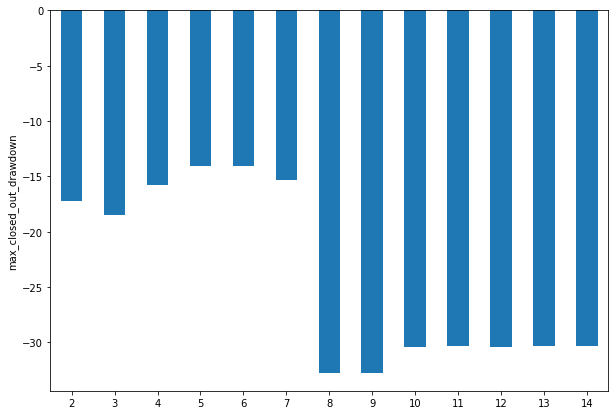

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-15 00:00:00 SELL 215 SPY @ 321.85


Equity curve

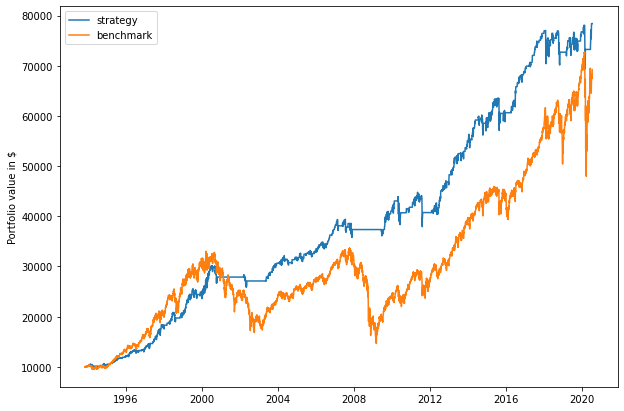

In [9]:
if   optimize_period: Y = '7'
elif optimize_smas:   Y = '70'
elif optimize_pct:    Y = '85'
elif optimize_margin: Y = '10'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)